# Weather Food Delivery Data Visualizations

This notebook explores 10 insightful visualizations from our master delivery dataset.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the data
df = pd.read_csv('data/master_delivery_data.csv')

# Set up the plotting style
plt.style.use('seaborn')
plt.figure(figsize=(15, 10))

OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## 1. Cuisine Distribution Across Cities

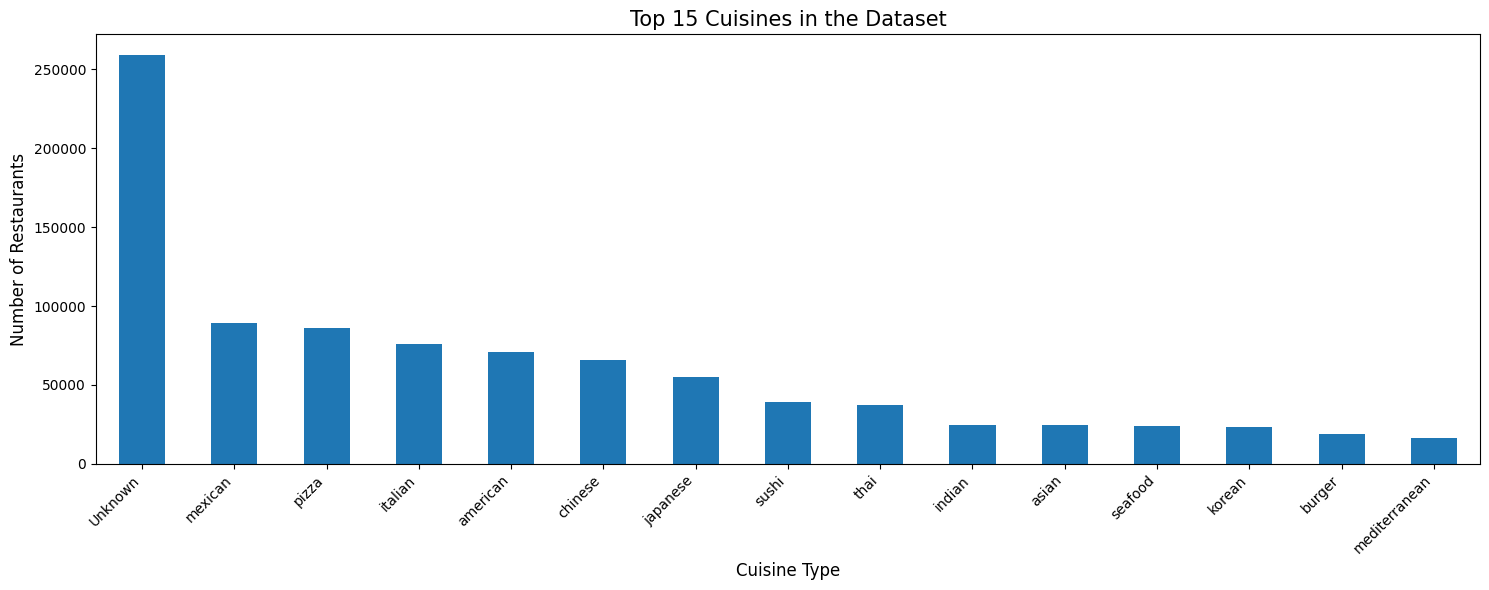

In [6]:
# Cuisine Distribution
plt.figure(figsize=(15, 6))
cuisine_counts = df['cuisine'].str.split(';', expand=True).stack().value_counts()
cuisine_counts.head(15).plot(kind='bar')
plt.title('Top 15 Cuisines in the Dataset', fontsize=15)
plt.xlabel('Cuisine Type', fontsize=12)
plt.ylabel('Number of Restaurants', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 2. Weather Impact on Restaurant Services

C:\Users\rishe\AppData\Local\Temp\ipykernel_39656\1121529587.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_by_temp = df.groupby('temp_category')['has_delivery'].mean()
C:\Users\rishe\AppData\Local\Temp\ipykernel_39656\1121529587.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  takeaway_by_temp = df.groupby('temp_category')['has_takeaway'].mean()


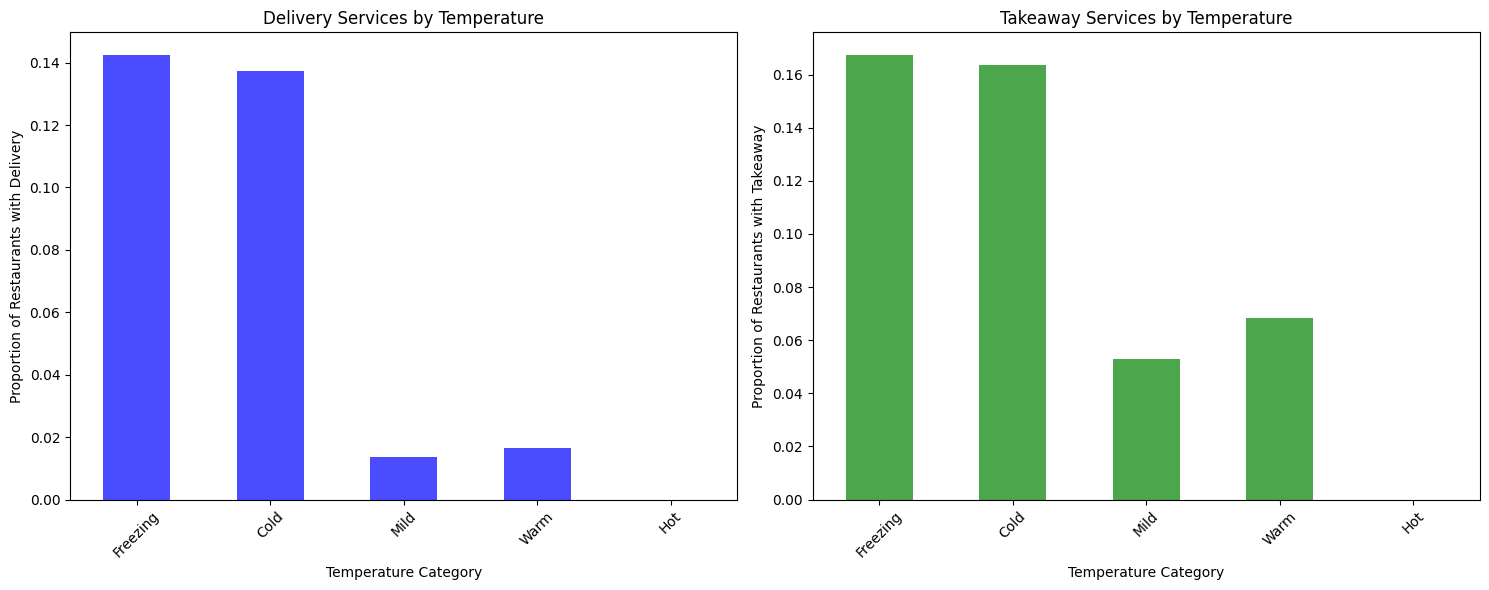

In [7]:
# Weather Impact on Delivery and Takeaway Services
plt.figure(figsize=(15, 6))

# Categorize temperature
df['temp_category'] = pd.cut(df['temperature_F'], 
                              bins=[-float('inf'), 32, 50, 70, 90, float('inf')],
                              labels=['Freezing', 'Cold', 'Mild', 'Warm', 'Hot'])

# Delivery services by temperature
delivery_by_temp = df.groupby('temp_category')['has_delivery'].mean()
takeaway_by_temp = df.groupby('temp_category')['has_takeaway'].mean()

plt.subplot(1, 2, 1)
delivery_by_temp.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Delivery Services by Temperature', fontsize=12)
plt.xlabel('Temperature Category', fontsize=10)
plt.ylabel('Proportion of Restaurants with Delivery', fontsize=10)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
takeaway_by_temp.plot(kind='bar', color='green', alpha=0.7)
plt.title('Takeaway Services by Temperature', fontsize=12)
plt.xlabel('Temperature Category', fontsize=10)
plt.ylabel('Proportion of Restaurants with Takeaway', fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 3. Geospatial Distribution of Restaurants

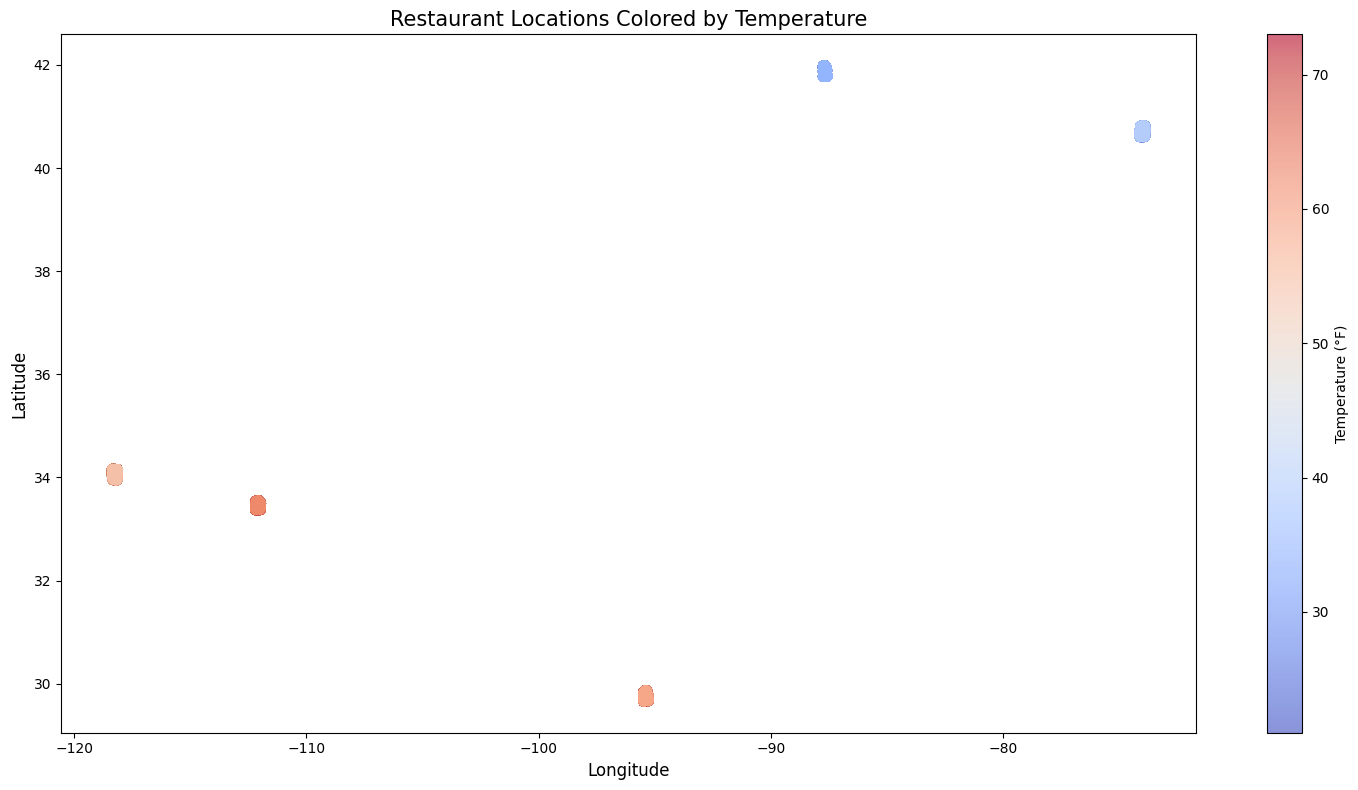

In [8]:
# Geospatial Distribution
plt.figure(figsize=(15, 8))
plt.scatter(df['longitude'], df['latitude'], 
            c=df['temperature_F'], 
            cmap='coolwarm', 
            alpha=0.6, 
            s=50)
plt.colorbar(label='Temperature (°F)')
plt.title('Restaurant Locations Colored by Temperature', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.tight_layout()
plt.show()

## 4. Humidity and Wind Speed Correlation

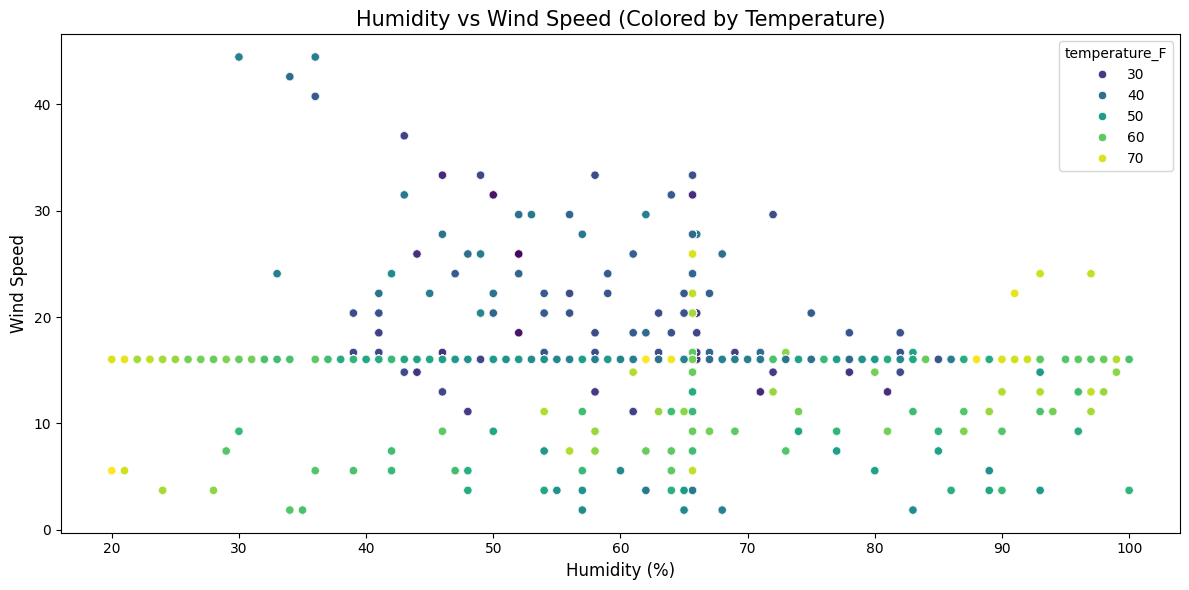

In [9]:
# Humidity vs Wind Speed
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='humidity', y='wind_speed', hue='temperature_F', palette='viridis')
plt.title('Humidity vs Wind Speed (Colored by Temperature)', fontsize=15)
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Wind Speed', fontsize=12)
plt.tight_layout()
plt.show()

## 5. Restaurant Opening Hours Distribution

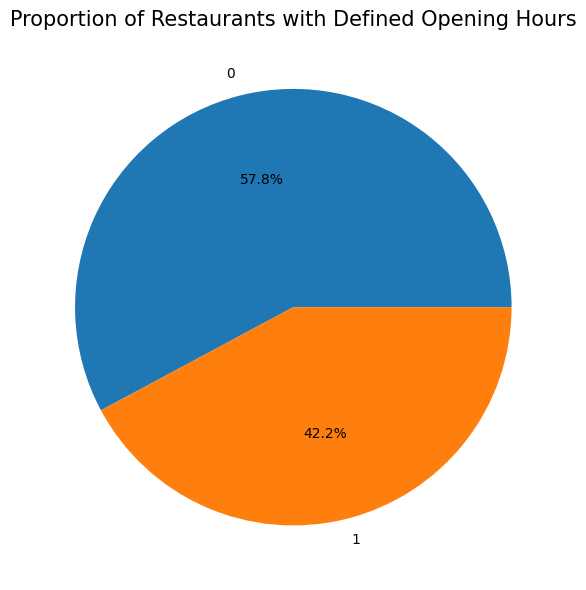

In [10]:
# Opening Hours Distribution
plt.figure(figsize=(12, 6))
df['has_opening_hours'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Restaurants with Defined Opening Hours', fontsize=15)
plt.ylabel('')
plt.tight_layout()
plt.show()

## 6. Precipitation Impact on Restaurant Services

C:\Users\rishe\AppData\Local\Temp\ipykernel_39656\3964543805.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delivery_by_precip = df.groupby('precip_category')['has_delivery'].mean()
C:\Users\rishe\AppData\Local\Temp\ipykernel_39656\3964543805.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  takeaway_by_precip = df.groupby('precip_category')['has_takeaway'].mean()


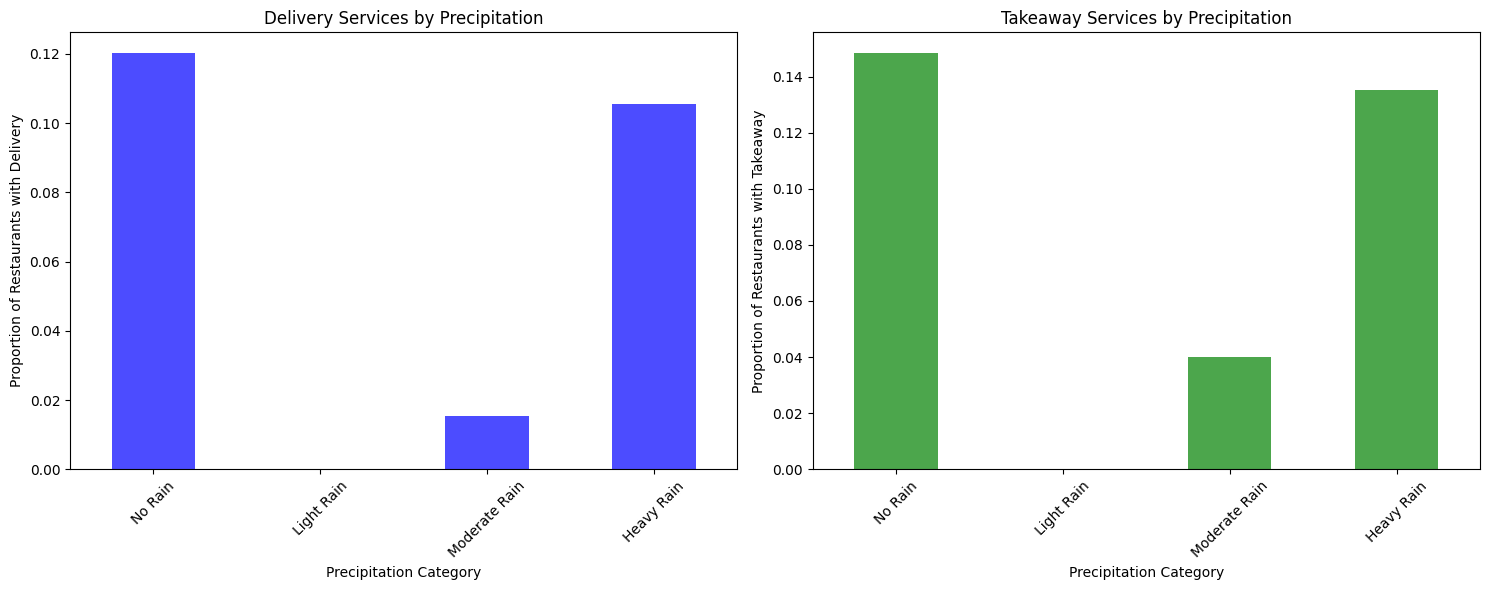

In [11]:
# Precipitation Impact
plt.figure(figsize=(15, 6))

# Categorize precipitation
df['precip_category'] = pd.cut(df['precipitation'], 
                                bins=[-float('inf'), 0.1, 0.5, 1, float('inf')],
                                labels=['No Rain', 'Light Rain', 'Moderate Rain', 'Heavy Rain'])

delivery_by_precip = df.groupby('precip_category')['has_delivery'].mean()
takeaway_by_precip = df.groupby('precip_category')['has_takeaway'].mean()

plt.subplot(1, 2, 1)
delivery_by_precip.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Delivery Services by Precipitation', fontsize=12)
plt.xlabel('Precipitation Category', fontsize=10)
plt.ylabel('Proportion of Restaurants with Delivery', fontsize=10)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
takeaway_by_precip.plot(kind='bar', color='green', alpha=0.7)
plt.title('Takeaway Services by Precipitation', fontsize=12)
plt.xlabel('Precipitation Category', fontsize=10)
plt.ylabel('Proportion of Restaurants with Takeaway', fontsize=10)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 7. Cuisine Diversity by City

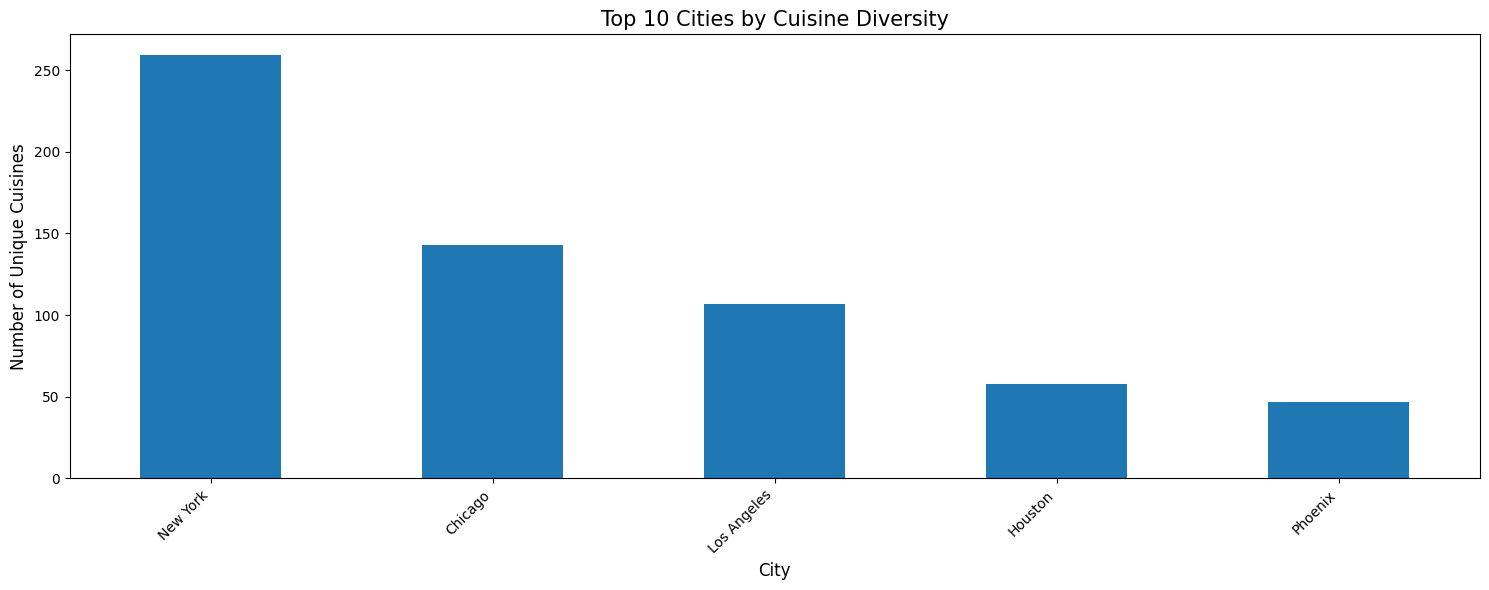

In [12]:
# Cuisine Diversity by City
plt.figure(figsize=(15, 6))

# Count unique cuisines per city
city_cuisine_diversity = df.groupby('city')['cuisine'].apply(lambda x: len(set(';'.join(x).split(';'))))
city_cuisine_diversity.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Cities by Cuisine Diversity', fontsize=15)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Unique Cuisines', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 8. Temperature Distribution

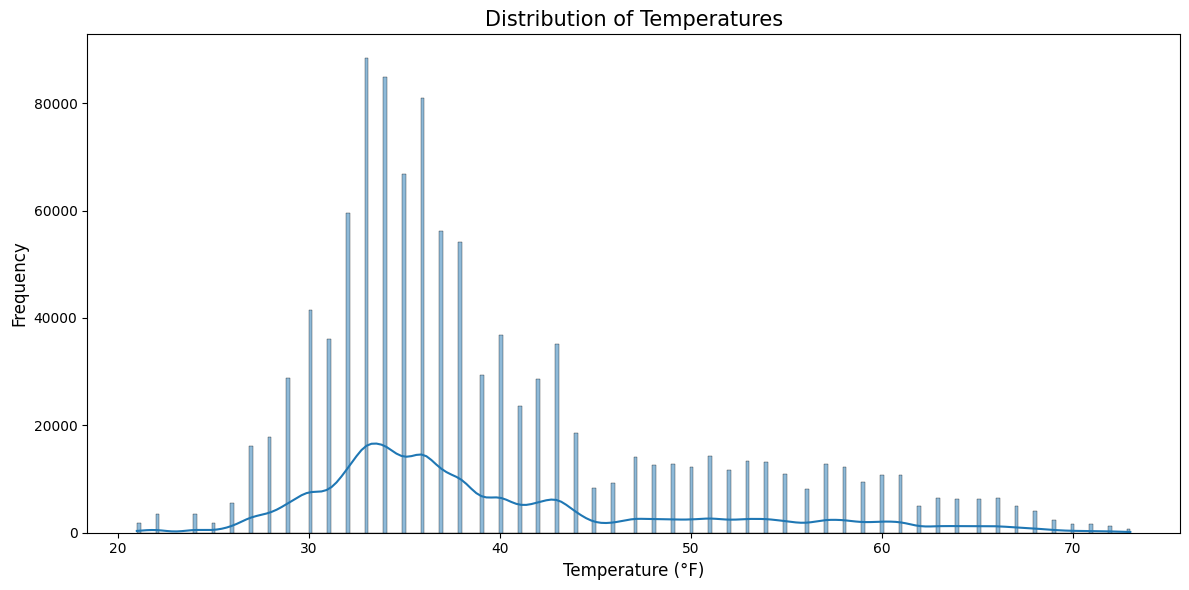

In [13]:
# Temperature Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='temperature_F', kde=True)
plt.title('Distribution of Temperatures', fontsize=15)
plt.xlabel('Temperature (°F)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

## 9. Restaurant Services Correlation

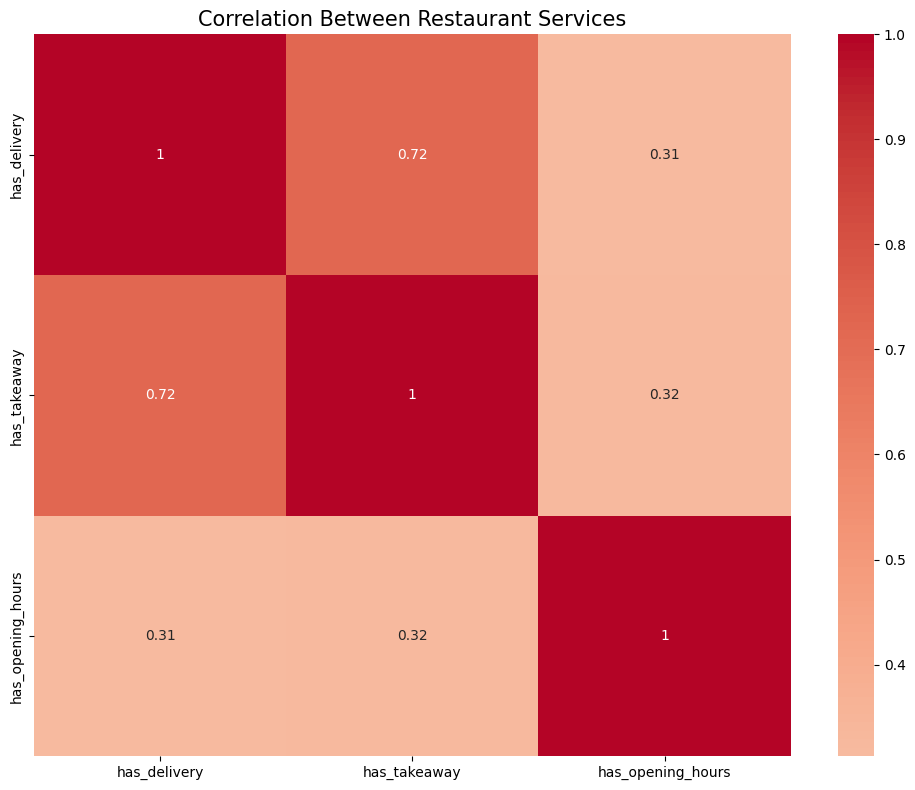

In [14]:
# Correlation of Restaurant Services
plt.figure(figsize=(10, 8))
services_corr = df[['has_delivery', 'has_takeaway', 'has_opening_hours']].corr()
sns.heatmap(services_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Restaurant Services', fontsize=15)
plt.tight_layout()
plt.show()

## 10. Weather Conditions Box Plot

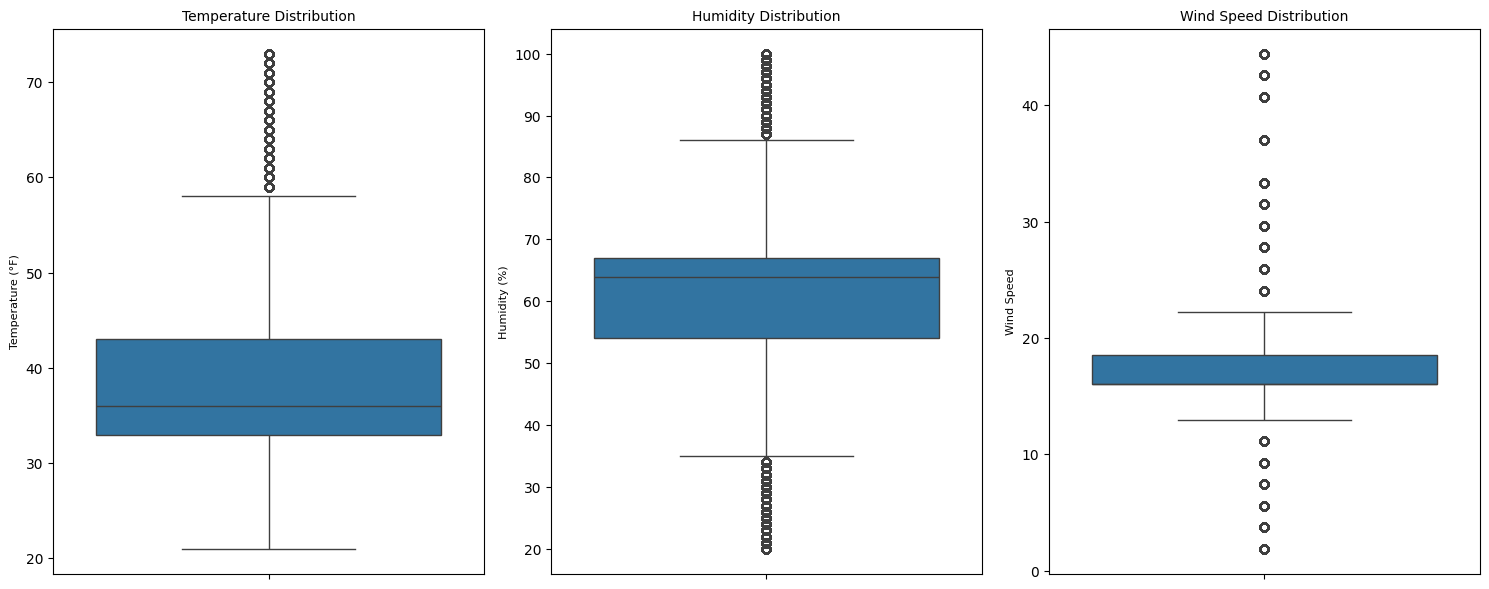

In [15]:
# Weather Conditions Box Plot
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='temperature_F')
plt.title('Temperature Distribution', fontsize=10)
plt.ylabel('Temperature (°F)', fontsize=8)

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='humidity')
plt.title('Humidity Distribution', fontsize=10)
plt.ylabel('Humidity (%)', fontsize=8)

plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='wind_speed')
plt.title('Wind Speed Distribution', fontsize=10)
plt.ylabel('Wind Speed', fontsize=8)

plt.tight_layout()
plt.show()